# For ploting WMH Box-plot 

In [ ]:
# Date of saving the final script: 10-04-2024
# Data File name:'09042024_first_visit_NACC_new_normalization_subjectID_anaimous.xlsx
# Created by: NIBR   ##(NY)
# created for:TP revision Manuscript tracking # 2023TP001189R

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import os
import seaborn  as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import openpyxl
from PIL import Image
import io
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from patsy.contrasts import Treatment
import researchpy as rp
import scipy.stats as stats
from statannot import add_stat_annotation

C:\Users\Neha Yadav\AppData\Local\Temp\ipykernel_24556\685825316.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [27]:
# for defining the path of working directory (where you have the files and want to store the output"
os.chdir(r'D:/Translation psychiatry/Revision_10-2-2024/Manuscript_revision_resubmission_09042024/Codes_and_files')
os.getcwd()

'D:\\Translation psychiatry\\Revision_10-2-2024\\Manuscript_revision_resubmission_09042024\\Codes_and_files'

In [28]:
df=pd.read_excel('09042024_first_visit_NACC_new_normalization_subjectID_anaimous.xlsx')


In [29]:
Columns_names=df.columns.values.tolist() 
print("COLUMNS Name :-", Columns_names)

COLUMNS Name :- ['SubjectID_A', 'NACCMRIA', 'NACCICV', 'NACCBRNV', 'CSFVOL', 'GRAYVOL', 'WHITEVOL', 'WMHVOL', 'HIPPOVOL', 'LATVENT', 'LENT', 'LENTM', 'LPARHIP', 'LPARHIPM', 'RENTM', 'RPARHIPM', 'SEX', 'NACCALZD', 'NACCAPOE', 'Normalized NACCBRNV', 'Normalized CSFVOL', 'Normalized GRAYVOL', 'Normalized WHITEVOL', 'Normalized WMHVOL', 'Normalized HIPPOVOL', 'Normalized LATVENT', 'Cognition', 'ENTM', 'PARHIPM', 'AgeGroup', 'Cn0Ci1Ad2']


In [30]:
df["AgeGroup"].value_counts()

AgeGroup
65-79    981
>=80     499
50-64    387
Name: count, dtype: int64

In [31]:
df_0= df[df['NACCALZD']==0]
df_1=df[df['NACCALZD']==1]
df_8=df[df['NACCALZD']==8]
df_0

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,542.478964,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1
3,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,559.714122,452.792341,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1
7,8,67,1304.078,920.781,361.594,517.685,403.096,21.7030,5.7300,41.0710,...,549.830760,428.126332,23.050652,6.085806,43.621312,CI,3.26460,1.77515,65-79,1
10,11,93,1322.042,890.376,384.108,520.330,370.046,47.5575,5.7736,43.6436,...,534.457641,380.093234,48.848748,5.930361,44.828581,CI,2.39120,1.57180,>=80,1
15,16,84,1120.158,784.792,306.594,492.071,292.721,28.7720,5.3200,30.3540,...,596.524332,354.857732,34.879516,6.449292,36.797331,CI,3.83265,1.87680,>=80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,1798,56,1595.464,1270.256,325.121,737.473,532.783,0.0870,7.6380,16.1290,...,637.125735,460.287713,0.075162,6.598704,13.934342,CI,4.06265,2.16980,50-64,1
1814,1815,70,1061.980,839.700,221.390,471.310,368.390,0.8900,5.1400,18.6600,...,614.691682,480.461413,1.160755,6.703688,24.336735,CI,3.91500,1.92500,65-79,1
1849,1850,68,1251.540,971.722,264.347,578.468,393.254,15.4711,6.0454,29.4488,...,640.179296,435.206561,17.121566,6.690327,32.590415,CI,3.63010,1.72150,65-79,1
1854,1855,69,1723.724,1192.320,521.124,666.816,525.504,10.2797,5.3301,104.8820,...,535.803200,422.255502,8.259994,4.282868,84.275289,CI,0.87160,0.96585,65-79,1


In [32]:
df_0["AgeGroup"].value_counts()

AgeGroup
65-79    107
>=80      61
50-64     29
Name: count, dtype: int64

In [33]:
df_1["AgeGroup"].value_counts()

AgeGroup
65-79    314
>=80     216
50-64     58
Name: count, dtype: int64

In [34]:
df_8["AgeGroup"].value_counts()

AgeGroup
65-79    560
50-64    300
>=80     222
Name: count, dtype: int64

In [35]:
df_50= df[(df['AgeGroup']=="50-64")]
df_50

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
1,2,64,1440.846,1152.588,286.419,648.068,504.520,1.8389,6.4687,13.5215,...,641.494636,499.402645,1.820248,6.403088,13.384351,CN,4.52340,2.45655,50-64,0
6,7,58,1526.920,1204.147,322.426,699.228,504.919,0.3470,7.2170,26.0900,...,653.119340,471.623510,0.324118,6.741095,24.369567,CN,3.43550,2.04420,50-64,0
14,15,59,1356.496,1073.989,282.326,564.362,509.627,0.1810,5.7670,9.6120,...,594.207960,536.578331,0.190572,6.071984,10.120325,CI_AD,3.19580,1.82855,50-64,2
22,23,60,1535.382,1204.884,326.247,651.872,553.012,4.2510,6.5800,32.0601,...,605.530327,513.698298,3.948796,6.112227,29.780943,CN,3.33735,1.65390,50-64,0
24,25,57,1460.366,1146.108,314.000,654.174,491.934,0.2580,7.0180,23.6240,...,638.883369,480.435558,0.251970,6.853962,23.071814,CN,3.19385,1.96180,50-64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,1820,59,1357.163,961.989,392.016,543.261,418.728,3.1577,5.5361,64.2178,...,571.709932,440.655516,3.323059,5.826009,67.580692,CI_AD,3.41575,1.98570,50-64,2
1827,1828,56,1568.730,1215.520,346.860,676.600,538.920,6.3500,7.6600,17.9900,...,615.139773,489.966194,5.773186,6.964190,16.355845,CN,4.23000,2.02000,50-64,0
1836,1837,58,1317.701,1061.813,255.659,570.786,491.027,0.2290,6.4840,14.3020,...,617.797937,531.469706,0.247861,7.018045,15.479963,CN,2.80495,1.98010,50-64,0
1846,1847,58,1255.630,1007.620,248.010,567.080,440.540,0.0000,6.7900,9.2100,...,644.128720,500.395829,0.000000,7.712552,10.461356,CN,3.59500,2.23000,50-64,0


In [36]:
df_65= df[(df['AgeGroup']=="65-79")]
df_65

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,542.478964,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1
2,3,76,1323.530,1009.560,313.970,602.200,407.360,0.0000,5.8200,32.2800,...,620.219995,419.549680,0.000000,5.994155,33.245934,CN,3.48500,1.75500,65-79,0
4,5,79,1385.370,982.130,400.810,585.710,396.420,2.4300,5.9400,48.1100,...,576.309345,390.057453,2.390998,5.844663,47.337834,CN,3.06500,1.60000,65-79,0
5,6,72,1443.517,1071.264,354.746,609.919,461.345,17.5068,4.8359,26.7070,...,575.955675,435.655015,16.531934,4.566613,25.219821,CN,1.97335,1.53755,65-79,0
7,8,67,1304.078,920.781,361.594,517.685,403.096,21.7030,5.7300,41.0710,...,549.830760,428.126332,23.050652,6.085806,43.621312,CI,3.26460,1.77515,65-79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1860,68,1336.808,916.167,414.542,490.408,425.759,6.0993,6.3861,120.2420,...,513.581936,445.877987,6.387519,6.687871,125.923964,CI_AD,2.84840,1.74740,65-79,2
1862,1863,73,1422.220,1038.060,359.830,645.150,392.910,24.3300,7.2900,45.0900,...,635.060572,386.765325,23.949506,7.175993,44.384843,CI_AD,4.10000,2.15500,65-79,2
1863,1864,70,1249.960,953.880,294.830,556.760,397.120,1.2500,6.1800,14.0600,...,607.170570,433.076329,1.363178,6.739554,15.333031,CN,4.02500,2.38500,65-79,0
1864,1865,68,1279.144,1029.621,247.755,607.516,422.105,1.7676,6.0000,27.0498,...,647.406543,449.821139,1.883664,6.393970,28.825936,CN,4.66795,2.61680,65-79,0


In [37]:
df_80= df[(df['NACCMRIA']>=80)]
df_80

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
3,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,559.714122,452.792341,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1
9,10,81,1132.244,806.324,292.472,467.745,338.579,33.4476,5.2175,39.2765,...,553.822463,400.886500,39.602844,6.177658,46.504416,CN,3.37990,2.17825,>=80,0
10,11,93,1322.042,890.376,384.108,520.330,370.046,47.5575,5.7736,43.6436,...,534.457641,380.093234,48.848748,5.930361,44.828581,CI,2.39120,1.57180,>=80,1
13,14,84,1205.011,831.841,355.220,452.556,379.285,17.9500,4.0970,81.6961,...,509.836102,427.291177,20.221935,4.615558,92.036392,CI_AD,1.23160,1.17715,>=80,2
15,16,84,1120.158,784.792,306.594,492.071,292.721,28.7720,5.3200,30.3540,...,596.524332,354.857732,34.879516,6.449292,36.797331,CI,3.83265,1.87680,>=80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,1852,84,1207.507,861.828,343.489,439.729,422.099,2.1901,4.4460,53.2161,...,494.361590,474.541213,2.462201,4.998378,59.827748,CI_AD,1.51500,1.27540,>=80,2
1856,1857,89,1389.956,947.616,426.074,587.759,359.857,16.2660,5.8660,60.7740,...,566.891149,347.080603,15.688490,5.657733,58.616274,CN,3.31025,1.56015,>=80,0
1860,1861,84,1342.628,950.262,377.936,586.758,363.504,14.4298,6.7707,46.3435,...,585.874722,362.956798,14.408078,6.760508,46.273737,CN,3.13060,1.57135,>=80,0
1861,1862,81,1149.656,891.682,256.246,498.808,392.874,1.7281,5.3158,24.5089,...,581.656976,458.127983,2.015127,6.198722,28.579679,CN,3.55680,1.52560,>=80,0


# For Boxplot for WMH

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


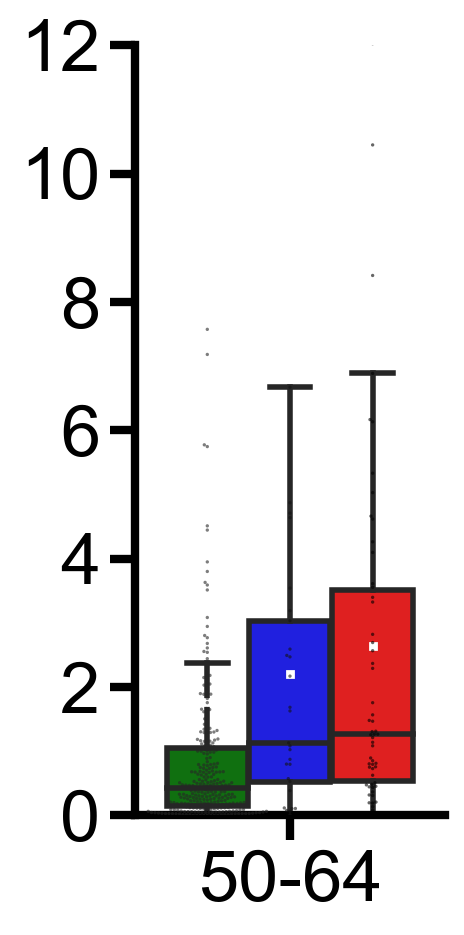

In [39]:
# For WMH Agegroup: 50-64

fig, ax = plt.subplots(figsize=(2, 5))
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',  hue = 'Cognition',
                   size = 1.2, data = df_50,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',
                hue = 'Cognition' , data = df_50,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0], [ '50-64'], fontsize=28)
    
plt.yticks(np.arange(0,13,2))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=26 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,12)
   
# png1 = io.BytesIO()    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)    
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image    
# i = "normalise_WMH_65"+".png"
#     # add .png at the end of the file name to save as png   
# path = os.path.join(path,i)    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


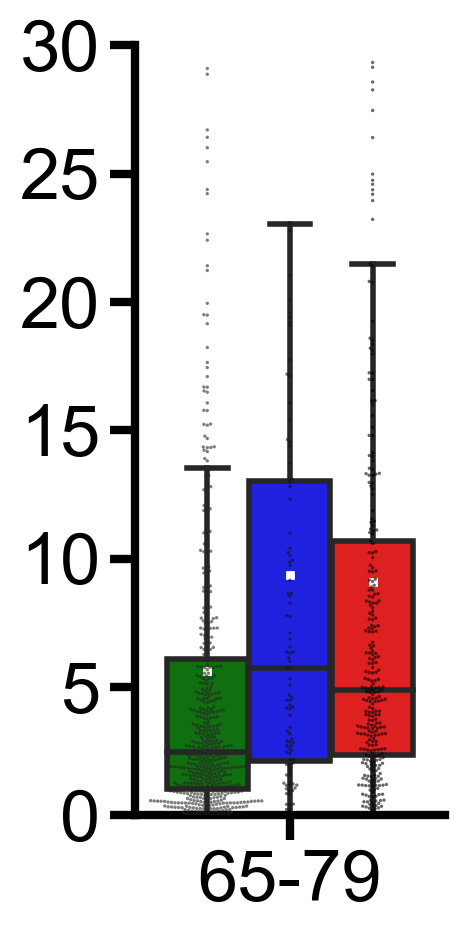

In [40]:
# For WMH Agegroup: 65-79

fig, ax = plt.subplots(figsize=(2, 5))
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',  hue = 'Cognition',
                   size = 1.2, data = df_65,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',
                hue = 'Cognition' , data = df_65,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0], [ "65-79"], fontsize=28 )
    
plt.yticks(np.arange(0,31,5))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=26 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,30)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)   
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image     
# i = "normalise_WMH_65.png"
#     # add .png at the end of the file name to save as png    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# # png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


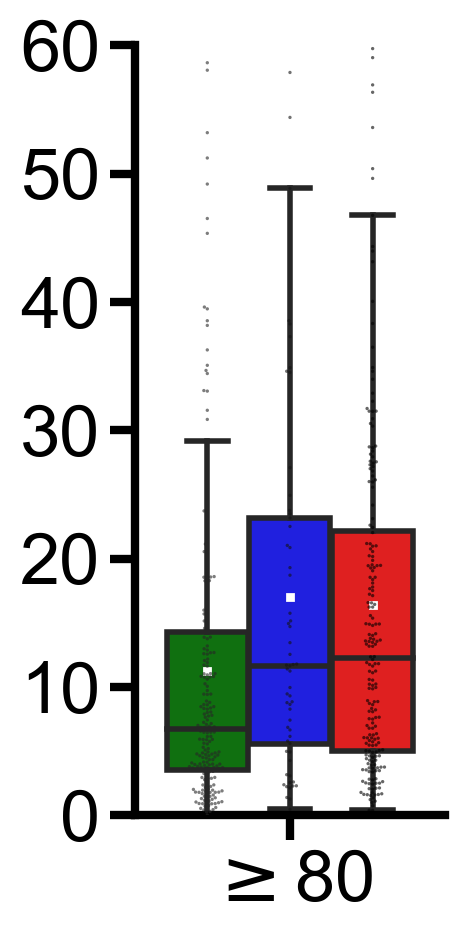

In [41]:
# For WMH Agegroup: >=80

fig, ax = plt.subplots(figsize=(2, 5))
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',  hue = 'Cognition',
                   size = 1.2, data = df_80,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized WMHVOL',
                hue = 'Cognition' , data = df_80,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0], [ r'$\geq$80'], fontsize=28 )
    
plt.yticks(np.arange(0,61,10))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=26 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,60)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)  
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image    
# i = "normalise_WMH_80.png"
#     # add .png at the end of the file name to save as png    
# path = os.path.join(path,i)    
#     # Save as TIFF 
# png2.save(path)
# png1.close()